In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [4]:
df = pd.read_csv("sleep_og.csv")
label = df["Sleep Disorder"]
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")
df = df.drop("Person ID",axis = 1)
df.replace('_RARE_', np.nan, inplace=True)
df.head()

Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200           None  
1          75        10000           None  
2          75        10000           None  
3          85         3000    Sleep Apnea  
4          85         3000    Sleep Apnea

# **Exploratory Data Analysis**

<Figure size 640x480 with 0 Axes>

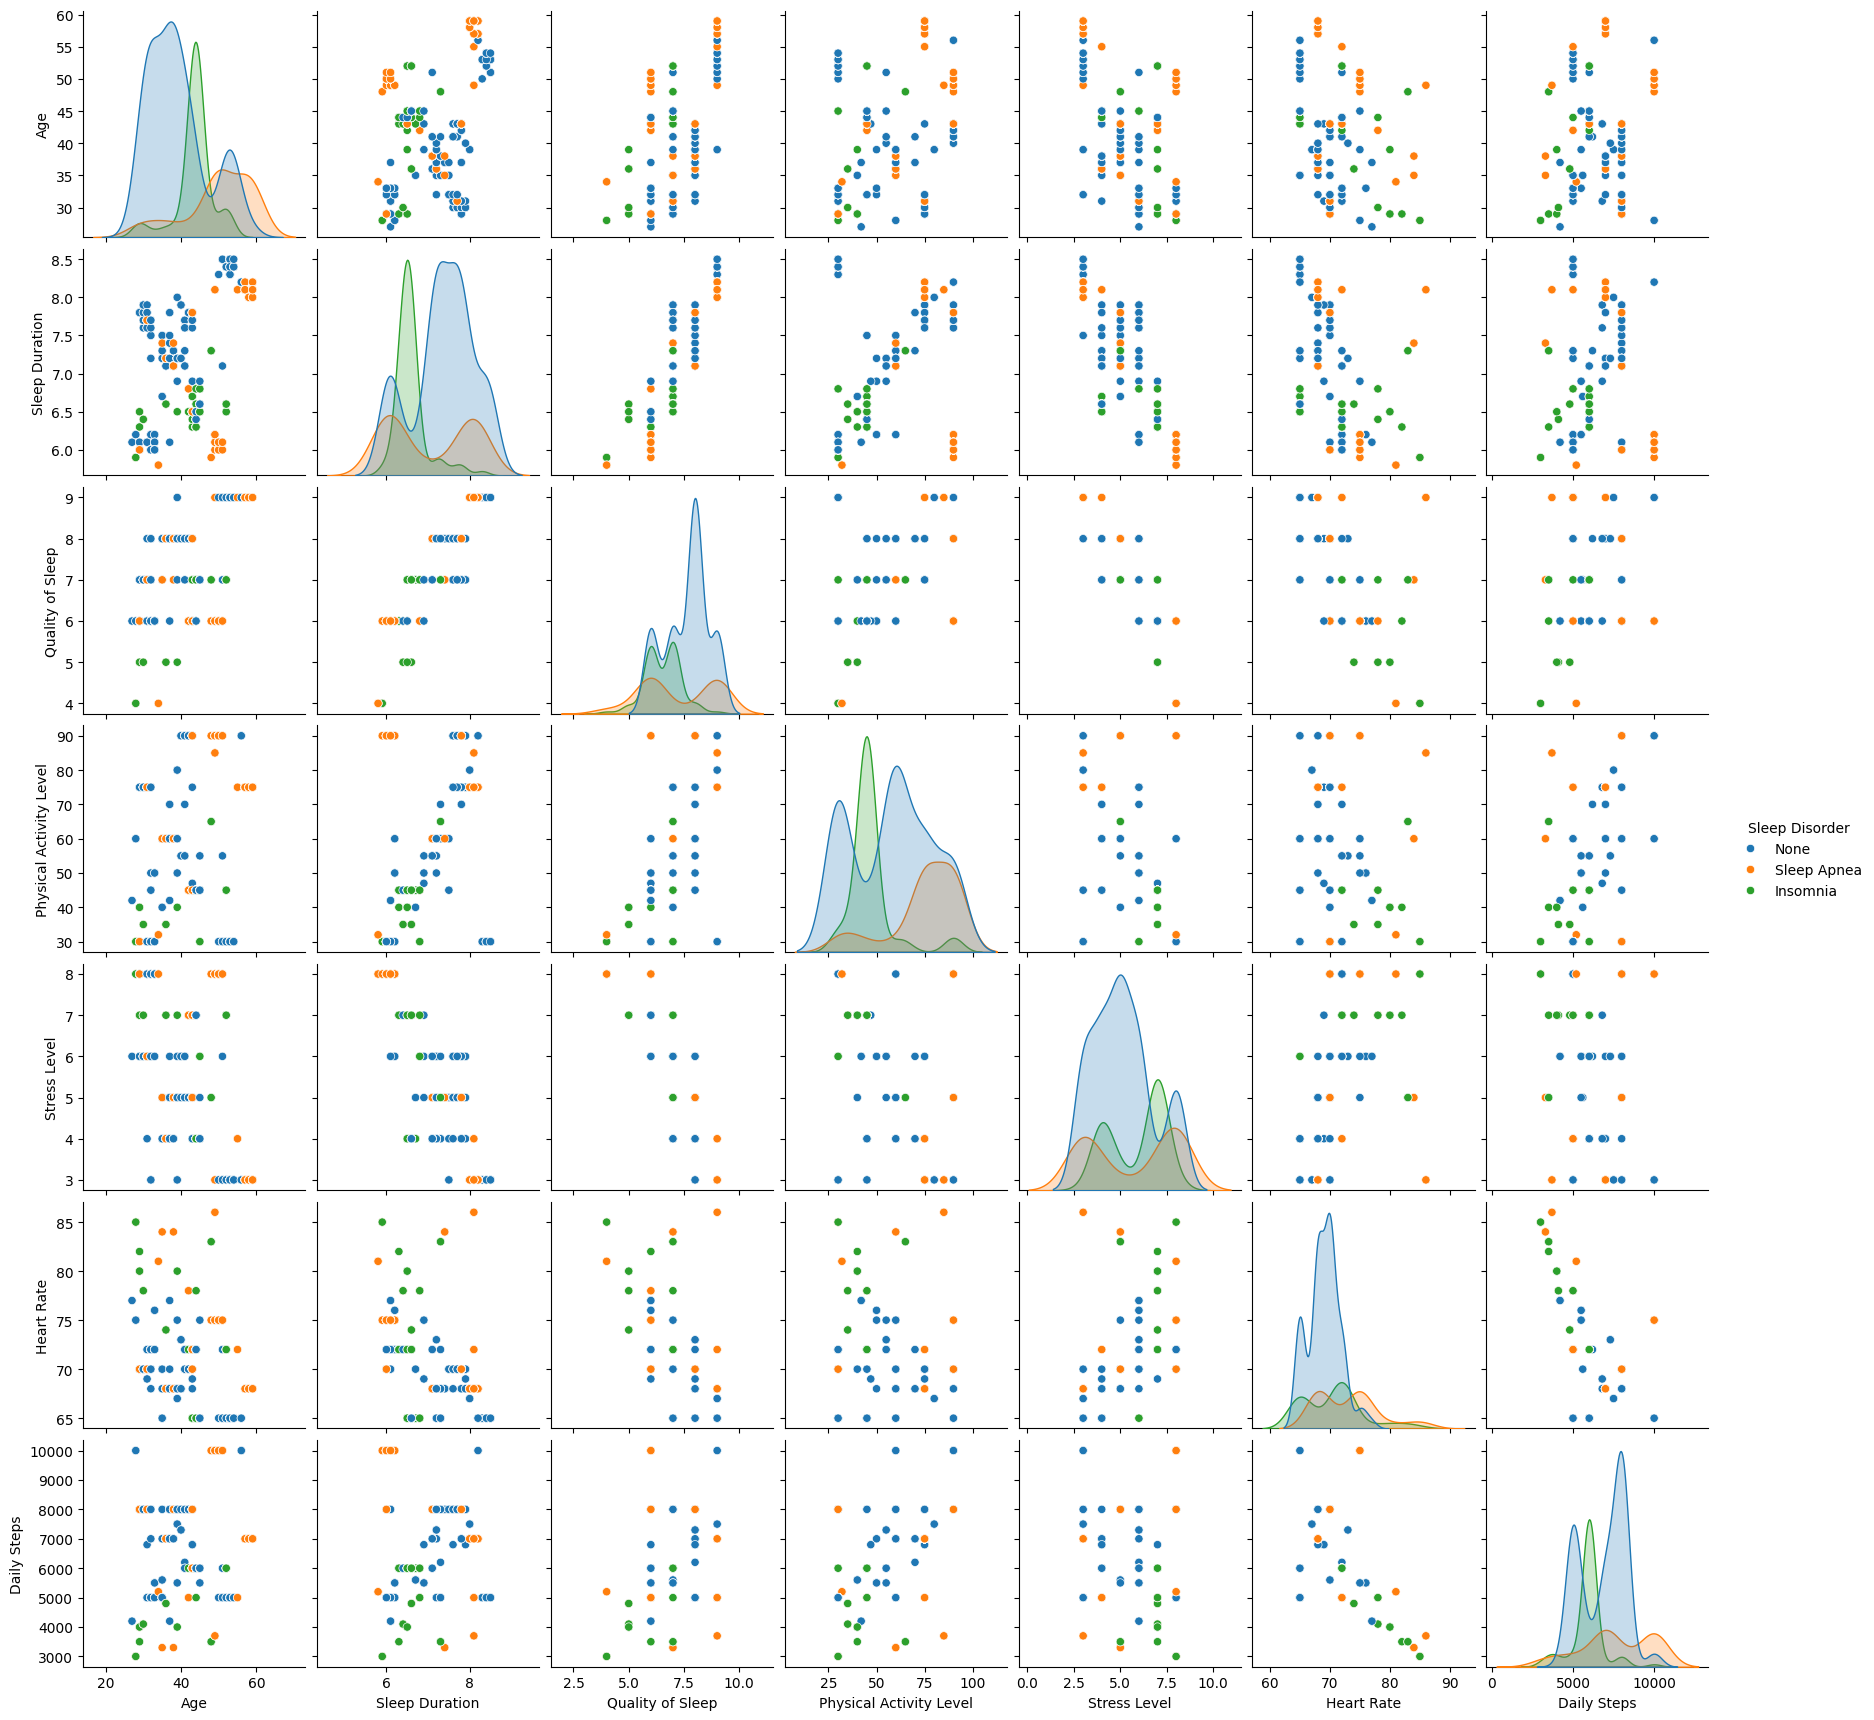

In [5]:
plt.figure()
sns.pairplot(df,hue="Sleep Disorder")
plt.show()

In [ ]:
plt.figure()
sns.boxplot(df)
plt.xticks(rotation=70)
plt.show()

In [ ]:
plt.figure(figsize=(12,18))
plt.subplot(2,2,1)
sns.countplot(df,x='Gender')

plt.subplot(2,2,2)
sns.countplot(df,x='Occupation')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.countplot(df,x='BMI Category')

plt.subplot(2,2,4)
sns.countplot(df,x='Sleep Disorder')

plt.show()

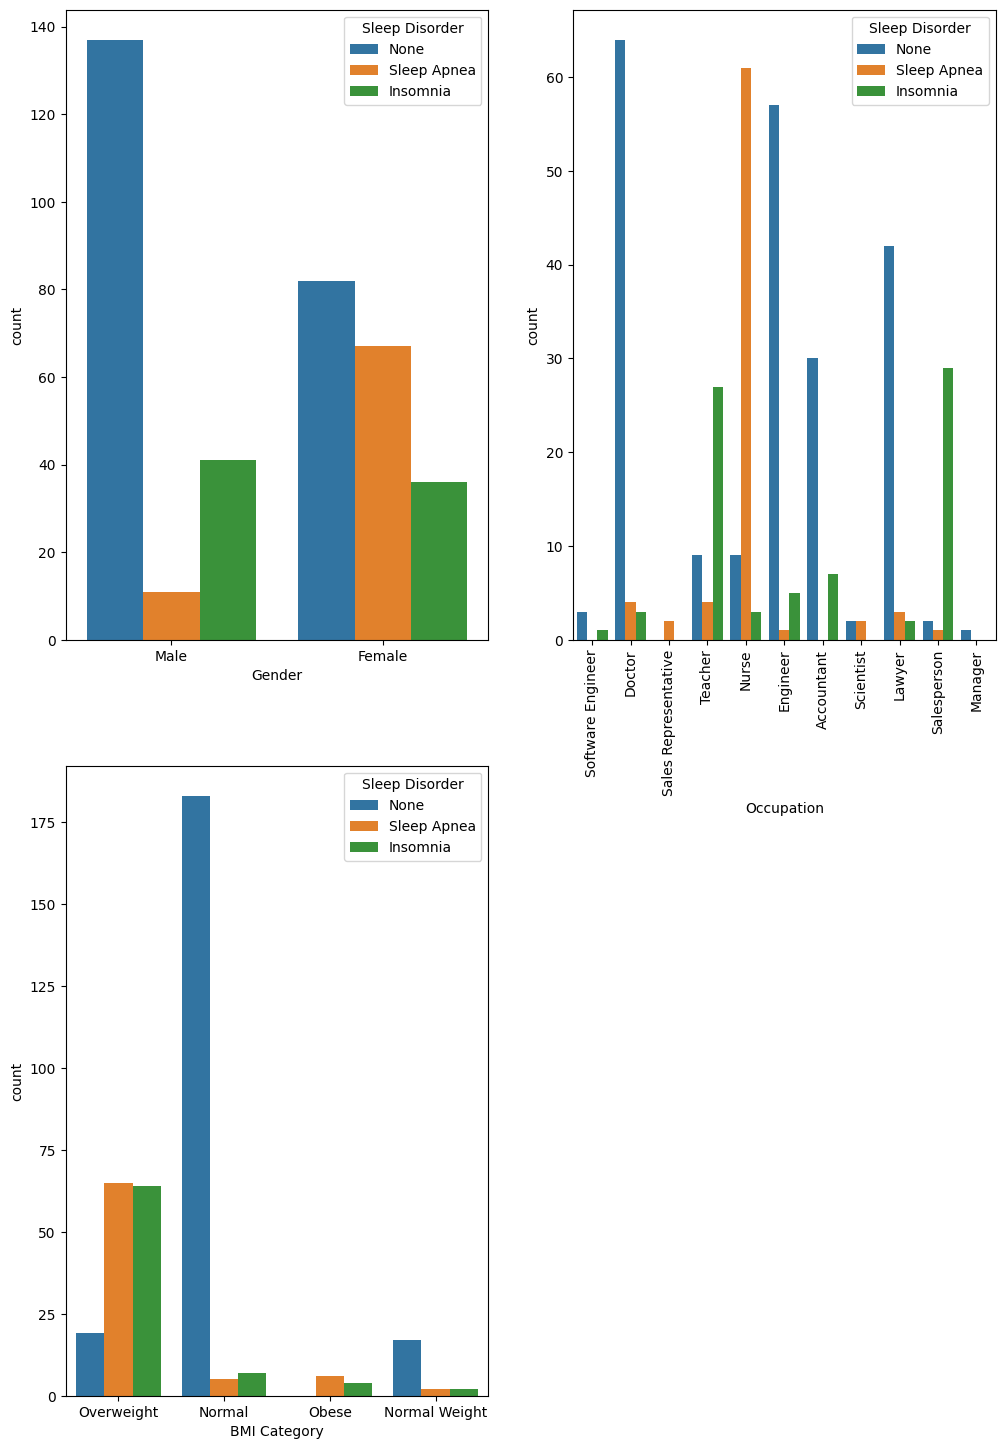

In [6]:
plt.figure(figsize=(12,18))
plt.subplot(2,2,1)
sns.countplot(df,x='Gender',hue='Sleep Disorder')

plt.subplot(2,2,2)
sns.countplot(df,x='Occupation',hue='Sleep Disorder')
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.countplot(df,x='BMI Category',hue='Sleep Disorder')

plt.show()

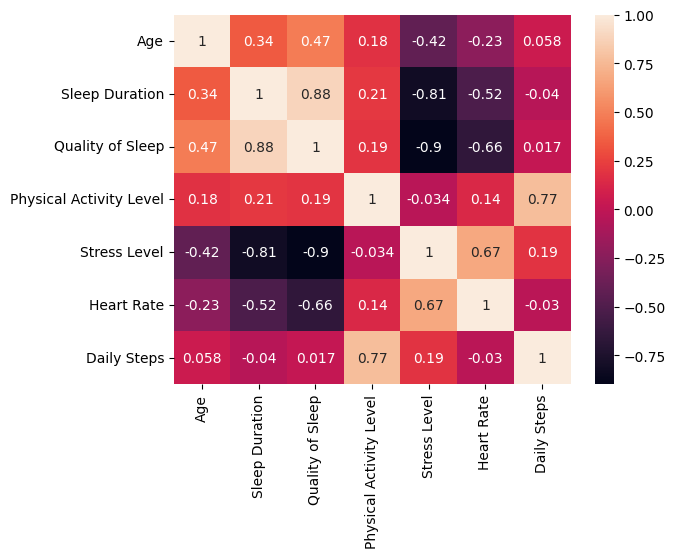

In [7]:
plt.figure()
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True);
plt.show()

In [ ]:
!pip install ydata-profiling
import ydata_profiling
report = df.profile_report(title="Sleep Data Analysis")
report.to_notebook_iframe()

# **Data Preprocessing**

In [8]:
print(df.isna().sum())



Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [9]:
df[['Systolic','Diastolic']] = df['Blood Pressure'].str.split('/',expand=True).apply(pd.to_numeric, errors='coerce')
df = pd.get_dummies(df,columns=["Occupation"],prefix="Occupation")
df.drop('Blood Pressure',axis=1,inplace=True)
df.head()

Gender  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0   Male   27             6.1                 6                       42   
1   Male   28             6.2                 6                       60   
2   Male   28             6.2                 6                       60   
3   Male   28             5.9                 4                       30   
4   Male   28             5.9                 4                       30   

   Stress Level BMI Category  Heart Rate  Daily Steps Sleep Disorder  ...  \
0             6   Overweight          77         4200           None  ...   
1             8       Normal          75        10000           None  ...   
2             8       Normal          75        10000           None  ...   
3             8        Obese          85         3000    Sleep Apnea  ...   
4             8        Obese          85         3000    Sleep Apnea  ...   

   Occupation_Doctor  Occupation_Engineer  Occupation_Lawyer  \
0              False                False              False   
1               True                False              False   
2               True                False              False   
3              False                False              False   
4              False                False              False   

   Occupation_Manager  Occupation_Nurse  Occupation_Sales Representative  \
0               False             False                            False   
1               False             False                            False   
2               False             False                            False   
3               False             False                             True   
4               False             False                             True   

   Occupation_Salesperson  Occupation_Scientist  Occupation_Software Engineer  \
0                   False                 False                          True   
1                   False                 False                         False   
2                   False                 False                         False   
3                   False                 False                         False   
4                   False                 False                         False   

   Occupation_Teacher  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 23 columns]

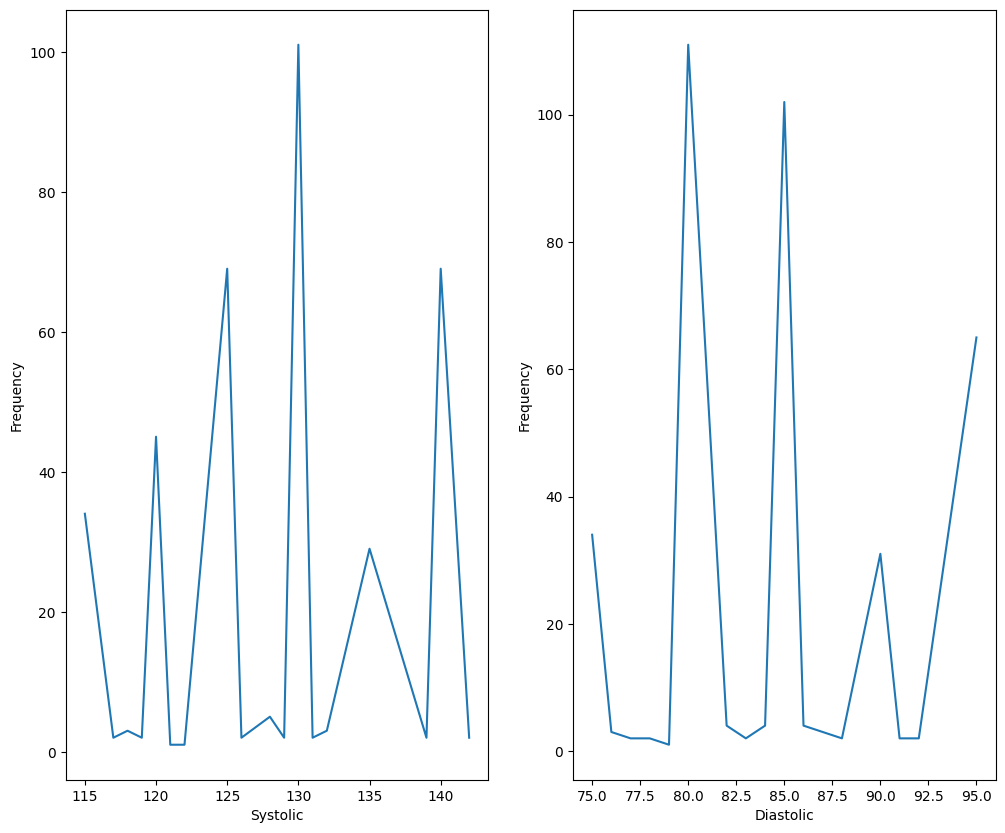

In [10]:
high_count = df['Systolic'].value_counts()
low_count = df['Diastolic'].value_counts()

high_count.sort_index(inplace = True)
low_count.sort_index(inplace = True)

plt.figure(figsize=(12, 10))
plt.subplot(1,2,1)
plt.plot(high_count.index,high_count.values)
plt.xlabel('Systolic')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.plot(low_count.index,low_count.values)
plt.xlabel('Diastolic')
plt.ylabel('Frequency')

plt.show()

In [11]:
df['Systolic'].fillna(df['Systolic'].mean(), inplace=True)
df['Diastolic'].fillna(df['Diastolic'].median(), inplace=True)

/var/folders/th/gcymwv6n1qq298rgjfmpfj380000gn/T/ipykernel_50835/2773316590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Systolic'].fillna(df['Systolic'].mean(), inplace=True)
/var/folders/th/gcymwv6n1qq298rgjfmpfj380000gn/T/ipykernel_50835/2773316590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [12]:
print(df.isna().sum())

Gender                             0
Age                                0
Sleep Duration                     0
Quality of Sleep                   0
Physical Activity Level            0
Stress Level                       0
BMI Category                       0
Heart Rate                         0
Daily Steps                        0
Sleep Disorder                     0
Systolic                           0
Diastolic                          0
Occupation_Accountant              0
Occupation_Doctor                  0
Occupation_Engineer                0
Occupation_Lawyer                  0
Occupation_Manager                 0
Occupation_Nurse                   0
Occupation_Sales Representative    0
Occupation_Salesperson             0
Occupation_Scientist               0
Occupation_Software Engineer       0
Occupation_Teacher                 0
dtype: int64


In [13]:
df.duplicated().sum()

242

In [14]:
df.describe()

Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
count  374.000000      374.000000        374.000000               374.000000   
mean    42.184492        7.132086          7.312834                59.171123   
std      8.673133        0.795657          1.196956                20.830804   
min     27.000000        5.800000          4.000000                30.000000   
25%     35.250000        6.400000          6.000000                45.000000   
50%     43.000000        7.200000          7.000000                60.000000   
75%     50.000000        7.800000          8.000000                75.000000   
max     59.000000        8.500000          9.000000                90.000000   

       Stress Level  Heart Rate   Daily Steps    Systolic   Diastolic  
count    374.000000  374.000000    374.000000  374.000000  374.000000  
mean       5.385027   70.165775   6816.844920  128.553476   84.649733  
std        1.774526    4.135676   1617.915679    7.748118    6.161611  
min        3.000000   65.000000   3000.000000  115.000000   75.000000  
25%        4.000000   68.000000   5600.000000  125.000000   80.000000  
50%        5.000000   70.000000   7000.000000  130.000000   85.000000  
75%        7.000000   72.000000   8000.000000  135.000000   90.000000  
max        8.000000   86.000000  10000.000000  142.000000   95.000000

In [15]:
from sklearn.preprocessing import StandardScaler
numerical_features = ["Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","Heart Rate","Daily Steps","Diastolic","Systolic"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.describe()

Age  Sleep Duration  Quality of Sleep  \
count  3.740000e+02    3.740000e+02      3.740000e+02   
mean  -4.559633e-16    1.348891e-15      2.469801e-16   
std    1.001340e+00    1.001340e+00      1.001340e+00   
min   -1.753096e+00   -1.676439e+00     -2.771424e+00   
25%   -8.006081e-01   -9.213348e-01     -1.098280e+00   
50%    9.415288e-02    8.547080e-02     -2.617083e-01   
75%    9.023241e-01    8.405750e-01      5.748635e-01   
max    1.941401e+00    1.721530e+00      1.411435e+00   

       Physical Activity Level  Stress Level    Heart Rate   Daily Steps  \
count             3.740000e+02  3.740000e+02  3.740000e+02  3.740000e+02   
mean             -3.324732e-17  1.994839e-16 -1.377389e-15 -9.499234e-17   
std               1.001340e+00  1.001340e+00  1.001340e+00  1.001340e+00   
min              -1.402260e+00 -1.345836e+00 -1.250750e+00 -2.362273e+00   
25%              -6.812078e-01 -7.815505e-01 -5.243827e-01 -7.531140e-01   
50%               3.984423e-02 -2.172650e-01 -4.013793e-02  1.133560e-01   
75%               7.608963e-01  9.113060e-01  4.441068e-01  7.322631e-01   
max               1.481948e+00  1.475592e+00  3.833820e+00  1.970077e+00   

           Systolic     Diastolic  
count  3.740000e+02  3.740000e+02  
mean  -9.119265e-16 -8.359326e-16  
std    1.001340e+00  1.001340e+00  
min   -1.751604e+00 -1.568203e+00  
25%   -4.592388e-01 -7.556402e-01  
50%    1.869437e-01  5.692287e-02  
75%    8.331262e-01  8.694859e-01  
max    1.737782e+00  1.682049e+00

In [16]:
import pickle

with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

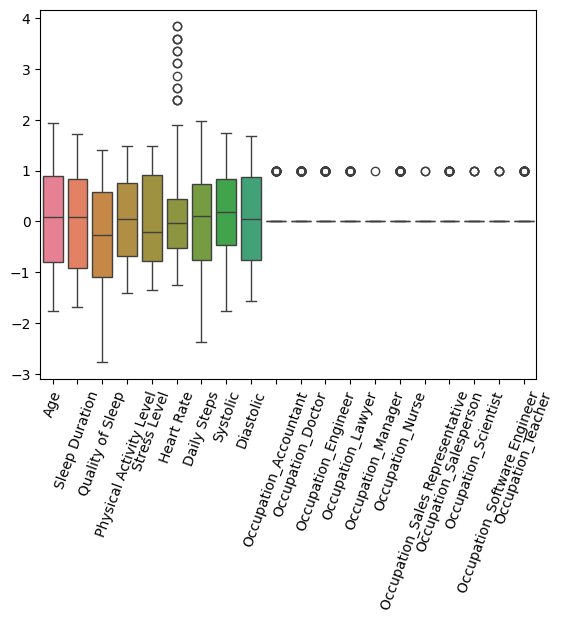

In [17]:
plt.figure()
sns.boxplot(df)
plt.xticks(rotation=70)
plt.show()

In [18]:
categorical_columns = ["Gender","BMI Category"]
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)



{'Female': 0, 'Male': 1}
{'Normal': 0, 'Normal Weight': 1, 'Obese': 2, 'Overweight': 3}


In [36]:
print(df.columns)

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic', 'Diastolic',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher'],
      dtype='object')


# **Model Training**

In [19]:
from imblearn.over_sampling import SMOTE  # Class imabalance handling
# label=label.tolist()
y = df["Sleep Disorder"]
X = df.drop("Sleep Disorder",axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.80)
counter_before = Counter(y_train)
print("Before oversampling : ",counter_before)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)
counter_after = Counter(y_train)
print("After oversampling : ",counter_after)

Before oversampling :  Counter({'None': 176, 'Sleep Apnea': 62, 'Insomnia': 61})
After oversampling :  Counter({'Insomnia': 176, 'None': 176, 'Sleep Apnea': 176})


In [20]:
X.head

<bound method NDFrame.head of      Gender       Age  Sleep Duration  Quality of Sleep  \
0         1 -1.753096       -1.298887         -1.098280   
1         1 -1.637643       -1.173036         -1.098280   
2         1 -1.637643       -1.173036         -1.098280   
3         1 -1.637643       -1.550588         -2.771424   
4         1 -1.637643       -1.550588         -2.771424   
..      ...       ...             ...               ...   
369       0  1.941401        1.218127          1.411435   
370       0  1.941401        1.092276          1.411435   
371       0  1.941401        1.218127          1.411435   
372       0  1.941401        1.218127          1.411435   
373       0  1.941401        1.218127          1.411435   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
0                  -0.825418      0.347021             3    1.654719   
1                   0.039844      1.475592             0    1.170474   
2                   0.039844      1.475592   

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)
y_prob_gnb = gnb.predict_proba(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

auc_roc_gnb = roc_auc_score(y_test, y_prob_gnb, multi_class='ovr')

cv_scores = cross_val_score(gnb, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

print(f"Naive Bayes Accuracy: {accuracy_gnb:.4f}")
print(f"Naive Bayes AUC-ROC Score: {auc_roc_gnb:.4f}")
print(f"5-Fold Cross-Validation Accuracy of Naive Bayes: {mean_cv_accuracy:.4f}")

Naive Bayes Accuracy: 0.5733
Naive Bayes AUC-ROC Score: 0.8588
5-Fold Cross-Validation Accuracy of Naive Bayes: 0.8029


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier(random_state=42)

dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
y_prob_dtc = dtc.predict_proba(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
auc_roc_dtc = roc_auc_score(y_test, y_prob_dtc, multi_class='ovr')

cv_scores = cross_val_score(dtc, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

print(f"Decision Tree Accuracy: {accuracy_dtc:.4f}")
print(f"Decision Tree AUC-ROC Score: {auc_roc_dtc:.4f}")
print(
    f"5-Fold Cross-Validation Accuracy of Decision Tree: {mean_cv_accuracy:.4f}")

Decision Tree Accuracy: 0.8933
Decision Tree AUC-ROC Score: 0.8880
5-Fold Cross-Validation Accuracy of Decision Tree: 0.9036


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
auc_roc_rfc = roc_auc_score(y_test, y_prob_rfc, multi_class='ovr')

cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

print(f"Random Forest Accuracy: {accuracy_rfc:.4f}")
print(f"Random Forest AUC-ROC Score: {auc_roc_rfc:.4f}")
print(f"5-Fold Cross-Validation Accuracy of Random Forest: {mean_cv_accuracy:.4f}")

Random Forest Accuracy: 0.8800
Random Forest AUC-ROC Score: 0.9197
5-Fold Cross-Validation Accuracy of Random Forest: 0.9262


In [24]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

perceptron.fit(X_train, y_train)

y_pred_perceptron = perceptron.predict(X_test)

accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)


cv_scores = cross_val_score(perceptron, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

print(f"Perceptron Accuracy: {accuracy_perceptron:.4f}")
print(f"5-Fold Cross-Validation Accuracy of Perceptron: {mean_cv_accuracy:.4f}")

Perceptron Accuracy: 0.9067
5-Fold Cross-Validation Accuracy of Perceptron: 0.8922


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)


accuracy = accuracy_score(y_test, y_pred)
auc_roc_knn = roc_auc_score(y_test, y_prob_knn, multi_class='ovr')
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()
print(f"Knn AUC-ROC Score: {auc_roc_knn:.4f}")
print(f"5-Fold Cross-Validation Accuracy of Knn: {mean_cv_accuracy:.4f}")
print(f'Knn Accuracy:{accuracy :.4f}')

Knn AUC-ROC Score: 0.8920
5-Fold Cross-Validation Accuracy of Knn: 0.8826
Knn Accuracy:0.8800


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
auc_roc_lr = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()
print(f"Logistic Regression AUC-ROC Score: {auc_roc_lr:.4f}")
print(f'Logistic RegressionAccuracy: {accuracy :.4f}')
print(
    f"5-Fold Cross-Validation Accuracy of Logistic Regression: {mean_cv_accuracy:.4f}")

Logistic Regression AUC-ROC Score: 0.9207
Logistic RegressionAccuracy: 0.8933
5-Fold Cross-Validation Accuracy of Logistic Regression: 0.9167


In [27]:
from sklearn.ensemble import VotingClassifier

clf1 = GaussianNB()
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
clf4 = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
clf5 = LogisticRegression()
clf6 = KNeighborsClassifier(n_neighbors=3)
ensemble = VotingClassifier(
    estimators=[('gnb', clf1), ('dtc', clf2), ('rfc', clf3), ('per', clf4),('log_reg',clf5),('knn',clf6)],
    voting='hard'
)


ensemble.fit(X_train, y_train)

y_pred_ensemble = ensemble.predict(X_test)

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

cv_scores = cross_val_score(ensemble, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()


print(f'Ensemble Model Accuracy: {accuracy_ensemble :.4f}')
print(f"5-Fold Cross-Validation Accuracy of Ensemble Model: {mean_cv_accuracy:.4f}")

Ensemble Model Accuracy: 0.8933
5-Fold Cross-Validation Accuracy of Ensemble Model: 0.9168


In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
# param_grid={
#     'n_estimators': [300],
#     'max_depth': [None],
#     'min_samples_split': [5],
#     'min_samples_leaf': [2],
# }

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)


best_rfc = grid_search.best_estimator_
best_rfc.fit(X_train, y_train)


y_pred_best_rfc = best_rfc.predict(X_test)
y_prob_best_rfc = best_rfc.predict_proba(X_test)

auc_roc_best_rfc = roc_auc_score(y_test, y_prob_best_rfc, multi_class='ovr')
accuracy_best_rfc = accuracy_score(y_test, y_pred_best_rfc)
cv_scores = cross_val_score(best_rfc, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

print(f"Optimized Random Forest AUC-ROC Score: {auc_roc_best_rfc:.4f}")
print(f"Optimized Random Forest Accuracy: {accuracy_best_rfc:.4f}")
print(
    f"5-Fold Cross-Validation Accuracy of Optimized Random Forest: {mean_cv_accuracy:.4f}")
# print(classification_report(y_test, y_pred_best_rfc, target_names=le.classes_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Optimized Random Forest AUC-ROC Score: 0.9195
Optimized Random Forest Accuracy: 0.8800
5-Fold Cross-Validation Accuracy of Optimized Random Forest: 0.9243


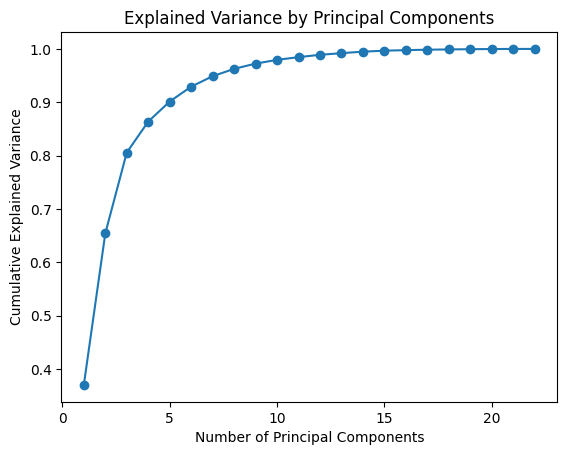

In [29]:
from sklearn.decomposition import PCA
X = df.drop('Sleep Disorder', axis=1)
y = df["Sleep Disorder"]
pca = PCA()
X_transformed = pca.fit_transform(X)
y = le.fit_transform(y)

plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.show()

In [30]:
y = df["Sleep Disorder"]
X = df.drop("Sleep Disorder",axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.80)
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

pca_optimal = PCA(n_components=0.95)
X_pca_optimal = pca_optimal.fit_transform(X_train)
X_test_pca_optimal = pca_optimal.fit_transform(X_test)

In [31]:
from sklearn.svm import SVC
param_grid = {'C': [0.1,0.5,1,5,10,100],  
              'gamma': [1,0.1,0.5,0.01], 
              'kernel': ['rbf','linear','polynomial']}  

grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_pca_optimal, y_train)

print("Best parameters found:", grid_search.best_params_)


best_rfc = grid_search.best_estimator_
best_rfc.fit(X_pca_optimal, y_train)


y_pred_best_rfc = best_rfc.predict(X_test_pca_optimal)
# y_prob_best_rfc = best_rfc.predict_proba(X_test_pca_optimal)

# auc_roc_best_rfc = roc_auc_score(y_test, y_prob_best_rfc, multi_class='ovr')
accuracy_best_rfc = accuracy_score(y_test, y_pred_best_rfc)
cv_scores = cross_val_score(best_rfc, X_pca_optimal, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

# print(f"Optimized Random Forest AUC-ROC Score: {auc_roc_best_rfc:.4f}")
print(f"Optimized SVM Accuracy: {accuracy_best_rfc:.4f}")
print(
    f"5-Fold Cross-Validation Accuracy of Optimized Random Forest: {mean_cv_accuracy:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Optimized SVM Accuracy: 0.4400
5-Fold Cross-Validation Accuracy of Optimized Random Forest: 0.9318


/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraint

In [32]:
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)


best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)


y_pred = best_svm.predict(X_test)
# y_prob_best_rfc = best_rfc.predict_proba(X_test_pca_optimal)

# auc_roc_best_rfc = roc_auc_score(y_test, y_prob_best_rfc, multi_class='ovr')
accuracy_best_rfc = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(best_svm, X_train, y_train, cv=5)
mean_cv_accuracy = cv_scores.mean()

# print(f"Optimized Random Forest AUC-ROC Score: {auc_roc_best_rfc:.4f}")
print(f"Optimized SVM Accuracy: {accuracy_best_rfc:.4f}")
print(
    f"5-Fold Cross-Validation Accuracy of Optimized Random Forest: {mean_cv_accuracy:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Optimized SVM Accuracy: 0.8933
5-Fold Cross-Validation Accuracy of Optimized Random Forest: 0.9489


/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/mlvenv/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraint

In [33]:
print(X_test)
print(y_pred)

     Gender       Age  Sleep Duration  Quality of Sleep  \
329       0  1.248683        1.721530          1.411435   
33        1 -1.291284       -1.298887         -1.098280   
15        1 -1.522190       -1.424738         -1.098280   
325       0  1.248683        1.721530          1.411435   
57        1 -1.175831       -1.424738         -1.098280   
..      ...       ...             ...               ...   
94        0 -0.714018        0.085471          0.574864   
195       1  0.094153       -0.795484         -1.098280   
312       0  1.133230        1.595679          1.411435   
292       0  0.902324       -1.298887         -1.098280   
372       0  1.941401        1.218127          1.411435   

     Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
329                -1.402260     -1.345836             0   -1.250750   
33                 -1.402260      1.475592             0    0.444107   
15                 -1.402260      1.475592             0   -0.040138   
325

In [34]:
import pickle

with open('SVM_Optimised_model.pkl','wb') as f:
    pickle.dump(best_svm,f)

# load
with open('SVM_Optimised_model.pkl', 'rb') as f:
    best_svm = pickle.load(f)

In [35]:
import pickle

with open('Random_Forest_Optimised_model.pkl','wb') as f:
    pickle.dump(best_rfc,f)

# load
with open('Random_Forest_Optimised_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
import os
import requests
from flask import Flask, request

In [ ]:
# app = Flask(__name__)

# @app.route('/api/input', methods=['GET'])
# def GetPrediction():
#   input = request.args['query']
#   d={}
#   d["output"]=str(input)
#   print(input)
#   return d


# app.run(debug=False,host="0.0.0.0",port=4444)
# input_data = [
#     0,                           # Gender
#     -0.37524940647582056,        # Age
#     1.697566990208276,           # Sleep Duration
#     -0.971686834747765,          # Quality of Sleep
#     0.7670134220942246,          # Physical Activity Level
#     0.3147253076298664,          # Stress Level
#     3,                           # BMI Category
#     -1.1185404504731764,         # Heart Rate
#     -0.30713741277226986,        # Daily Steps
#     -0.45977656779801523,        # Systolic
#     -0.7599037156231677,         # Diastolic
#     0,                           # Occupation_Accountant
#     1,                           # Occupation_Doctor
#     0,                           # Occupation_Engineer
#     0,                           # Occupation_Lawyer
#     0,                           # Occupation_Nurse
#     0,                           # Occupation_Salesperson
#     0                            # Occupation_Teacher
# ]

input_data = [
    1,                       # Gender
    -0.268826,               # Age
    -0.821305,               # Sleep Duration
    -0.971687,               # Quality of Sleep
    0.024918,                # Physical Activity Level
    -0.247954,               # Stress Level
    3,                       # BMI Category
    1.077403,                # Heart Rate
    -0.307137,               # Daily Steps
    -0.459777,               # Systolic
    -0.759904,               # Diastolic
    0,                       # Occupation_Accountant
    0,                       # Occupation_Doctor
    0,                       # Occupation_Engineer
    0,                       # Occupation_Lawyer
    0,                       # Occupation_Nurse
    1,                       # Occupation_Salesperson
    0                        # Occupation_Teacher
]

# Convert to a 2D array (1 sample, n features)
input_data = np.array([input_data])
rfc.predict(input_data)

In [ ]:
X_test.iloc[1]